In [68]:
from rcm_library import *

# Evaluation Exercises




<!-- 1. Create a new file named model_evaluation.py or model_evaluation.ipynb for these exercises. -->


2. Given the following confusion matrix, evaluate (by hand) the model's performance.


|               | pred dog   | pred cat   |
|:------------  |-----------:|-----------:|
| actual dog    |         46 |         7  |
| actual cat    |         13 |         34 |


- In the context of this problem, what is a false positive?
- In the context of this problem, what is a false negative?
- How would you describe this model?

    - My 1st step was to transpose this table since we usually define our predicted to be our colums:






|               |  Positive Actual  | Negative Actual | Margins|
|:------------  |-----------:|-----------:|-----------:|
|  Predicted Positive  |        TP|        FP | Precision|
|  Predicted Negative  |         FN |         TN|NPV|
|Margins|  Recall/Sensitivity: |         Specifiicity |        Accuracy|

    
- Now that it is in the statdard format we can just substite our values into the formulas for each marginal calculation.








In [69]:
## Let cat be the positive class
## Let dog be the negative class

tn=46
fp=7
fn=13
tp=34

npv= tn/(tn+fn)
prec_ppv=tp/(tp+fp)
acc=(tp+tn)/(tp+fp+fn+tn)
recall=tp/(tp+fn)


print(f'{npv:.3g}')
print(f'{prec_ppv:.3g}')
print(f'{acc:.3g}')
print(f'{recall:.3g}')






0.78
0.829
0.8
0.723


3. You are working as a datascientist working for Codeup Cody Creator (C3 for short), a rubber-duck manufacturing plant.

Unfortunately, some of the rubber ducks that are produced will have defects. Your team has built several models that try to predict those defects, and the data from their predictions can be found here.

Use the predictions dataset and pandas to help answer the following questions:

- An internal team wants to investigate the cause of the manufacturing defects. They tell you that they want to identify as many of the ducks that have a defect as possible. Which evaluation metric would be appropriate here? Which model would be the best fit for this use case?
- Model three has the highest true negatives


- Recently several stories in the local news have come out highlighting customers who received a rubber duck with a defect, and portraying C3 in a bad light. The PR team has decided to launch a program that gives customers with a defective duck a vacation to Hawaii. They need you to predict which ducks will have defects, but tell you the really don't want to accidentally give out a vacation package when the duck really doesn't have a defect. Which evaluation metric would be appropriate here? Which model would be the best fit for this use case?


In [70]:
from rcm_library import *

from IPython.display import display, HTML


from sympy import Matrix
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay



# def pretty_print_df_newline(df):
    
#     return display( HTML( df.to_html().replace("\\n","<br>") ) )






ducks=pd.read_csv('c3.csv')
ducks=pd.DataFrame(ducks)
# ducks.info()
#     
display(
ducks.describe(include='all').T,
pd.DataFrame(ducks.actual.value_counts())
)

def centered_text(content):
    display(HTML(f"<div style='text-align:center'>{content}</div>"))


,count,unique,top,freq
actual,200,2,No Defect,184
model1,200,2,No Defect,190
model2,200,2,No Defect,110
model3,200,2,No Defect,101


,actual
No Defect,184
Defect,16


In [71]:


duckcols=list(ducks.columns)
duckcols.pop(0)



'actual'

In [72]:
def confusion_matrix_analyis(arr):
    arr=arr
    
    
    tn=float(arr[0][0])
    fp=float(arr[0][1])
    fn=float(arr[1][0])
    tp=float(arr[1][1])








    
    npv= tn/(tn+fn)
    ppv=tp/(tp+fp)
    acc=(tp+tn)/(tp+fp+fn+tn)
    recall=tp/(tp+fn)
    mcc= ((tp*tn)-(fp*fn))/sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))
      ##recall=TPR
    f1=2*((ppv*recall)/(ppv+ppv))


    tn=float(f'{tn:.4g}')
    fp=float(f'{fp:.4g}')
    fn=float(f'{fn:.4g}')
    tp=float(f'{tp:.4g}')
    npv=float(f'{npv:.4g}')
    ppv=float(f'{ppv:.4g}')
    acc=float(f'{acc:.4g}')
    recall=float(f'{recall:.4g}')
    mcc=float(f'{mcc:.4g}')
    f1=float(f'{f1:.4g}')

  

    
    dfindex=[
    'tn',
    'fp',
    'fn',
    'tp',
    'npv',
    'ppv',
    'acc',
    'recall',
    'mcc',
    'f1']

    dfvals=[
    tn,
    fn,
    tp,
    fp,
    npv,
    ppv,
    acc,
    recall,
    mcc,
    f1]


    df=pd.DataFrame(data=dfvals,index=dfindex)
    df=df.T
    return (df)
    













    
standardConfusionMatrix_margins = pd.DataFrame(  {
    'Predicted Negative' : [ 'True Negative \n(TN)','False Negative\n (FN)','NPV:\n TN/(TN+FN)'],
      'Predicted Positive'  :['False Positive \n(FP)','True Positive\n (TP)', 'Precision/PPV:\nTP/(TP+FP)'],
    
    '' : ['Recall/Sensitivity:\nTP/(TP+FN)', 'Specificity:\n TN/(FP+TN)', 'Accuracy:\n TP+TN)/\n(TP+FP+FN+TN)']
},dtype=object )
standardConfusionMatrix_margins.rename(index={0:'Actual Negative ',1: 'Actual Positive',2:''}, inplace=True)
# standardConfusionMatrix=pretty_print(standardConfusionMatrix)
# standardConfusionMatrix=pd.DataFrame(standardConfusionMatrix,dtype=object)
standardConfusionMatrix_margins.shape
    


standardConfusionMatrix_vars= pd.DataFrame(  {
    'Predicted Negative' : [ 'TN','FN'],
      'Predicted Positive'  :['FP','TP'],
    
    
},dtype=object )
standardConfusionMatrix_vars.rename(index={0:'Actual Negative ',1: 'Actual Positive',2:''}, inplace=True)

standardConfusionMatrix_vars





#     npv
#     ppv
#     acc
#     recall






,Predicted Negative,Predicted Positive
Actual Negative,TN,FP
Actual Positive,FN,TP


In [73]:
[(centered_text(f'Ducks Actual vs {i}'),display(Matrix(confusion_matrix(y_true=ducks['actual'],y_pred= ducks[i])))) for i in duckcols]


⎡8   8 ⎤
⎢      ⎥
⎣2  182⎦

⎡9    7 ⎤
⎢       ⎥
⎣81  103⎦

⎡13  3 ⎤
⎢      ⎥
⎣86  98⎦

[(None, None), (None, None), (None, None)]

Ducks Actual vs model1


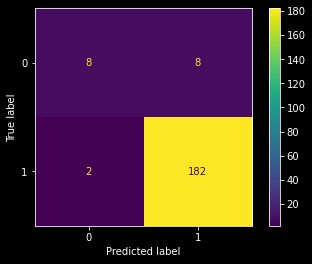

Ducks Actual vs model2


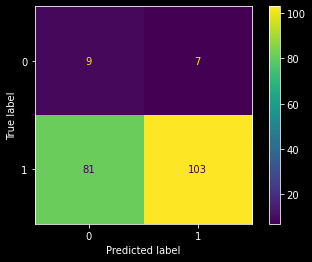

Ducks Actual vs model3


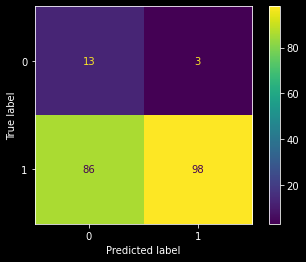

[(None,
  None),
 (None,
  None),
 (None,
  None)]

In [74]:
[(print(f'Ducks Actual vs {i}'),ConfusionMatrixDisplay((confusion_matrix(y_true=ducks['actual'],y_pred= ducks[i]))).plot(),plt.show()) for i in duckcols]


In [75]:
a=[(confusion_matrix_analyis((confusion_matrix(y_true=ducks['actual'],y_pred= ducks[i]))).rename(index={0:f'Ducks Actual vs {i}'})) for i in (duckcols)]
df=pd.DataFrame([])
for i in range(0,len(a)):
    df=pd.concat([df,a[i]])
df


,tn,fp,fn,tp,npv,ppv,acc,recall,mcc,f1
Ducks Actual vs model1,8.0,2.0,182.0,8.0,0.8000,0.9579,0.950,0.9891,0.60890,0.9891
Ducks Actual vs model2,9.0,81.0,103.0,7.0,0.1000,0.9364,0.560,0.5598,0.06668,0.5598
Ducks Actual vs model3,13.0,86.0,98.0,3.0,0.1313,0.9703,0.555,0.5326,0.18730,0.5326


In [76]:
standardConfusionMatrix_vars

,Predicted Negative,Predicted Positive
Actual Negative,TN,FP
Actual Positive,FN,TP


In [77]:
[display(standardConfusionMatrix_vars+':  '+(confusion_matrix(y_true=ducks['actual'],y_pred= ducks[i])).astype(str)) for i in duckcols]




,Predicted Negative,Predicted Positive
Actual Negative,TN: 8,FP: 8
Actual Positive,FN: 2,TP: 182


,Predicted Negative,Predicted Positive
Actual Negative,TN: 9,FP: 7
Actual Positive,FN: 81,TP: 103


,Predicted Negative,Predicted Positive
Actual Negative,TN: 13,FP: 3
Actual Positive,FN: 86,TP: 98


[None, None, None]

In [78]:
results=[(confusion_matrix_analyis(confusion_matrix(y_true=ducks['actual'],y_pred= ducks[i]))) for i in duckcols]
pd.DataFrame(data=results[0])


,tn,fp,fn,tp,npv,ppv,acc,recall,mcc,f1
0,8.0,2.0,182.0,8.0,0.8,0.9579,0.95,0.9891,0.6089,0.9891


In [79]:
[display(pd.DataFrame(classification_report(y_true=ducks['actual'],y_pred= ducks[i],output_dict=True)))
 for i in duckcols]#.rename(axis={'index':f'Ducks Actual vs {i}'})) for i in duckcols]





,Defect,No Defect,accuracy,macro avg,weighted avg
precision,0.800000,0.957895,0.95,0.878947,0.945263
recall,0.500000,0.989130,0.95,0.744565,0.950000
f1-score,0.615385,0.973262,0.95,0.794323,0.944632
support,16.000000,184.000000,0.95,200.000000,200.000000


,Defect,No Defect,accuracy,macro avg,weighted avg
precision,0.100000,0.936364,0.56,0.518182,0.869455
recall,0.562500,0.559783,0.56,0.561141,0.560000
f1-score,0.169811,0.700680,0.56,0.435246,0.658211
support,16.000000,184.000000,0.56,200.000000,200.000000


,Defect,No Defect,accuracy,macro avg,weighted avg
precision,0.131313,0.970297,0.555,0.550805,0.903178
recall,0.812500,0.532609,0.555,0.672554,0.555000
f1-score,0.226087,0.687719,0.555,0.456903,0.650789
support,16.000000,184.000000,0.555,200.000000,200.000000


[None, None, None]

In [80]:
paws=pd.read_csv('gives_you_paws.csv')
paws=pd.DataFrame(paws)
paws.head()
pawscols=list(paws.columns[1:])


Paws Actual vs model1


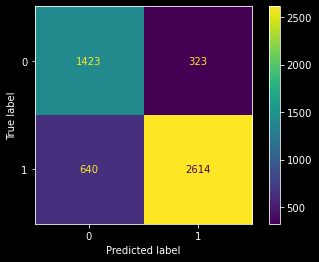

Paws Actual vs model2


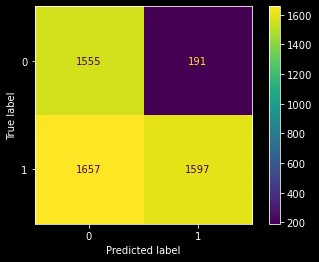

Paws Actual vs model3


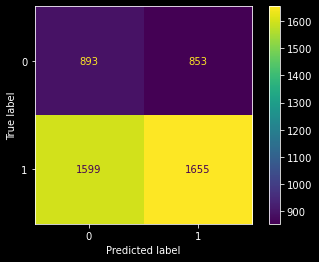

Paws Actual vs model4


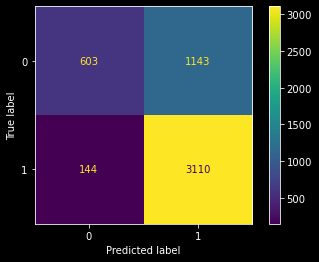

[(None,
  None),
 (None,
  None),
 (None,
  None),
 (None,
  None)]

In [81]:
[(print(f'Paws Actual vs {i}'),ConfusionMatrixDisplay((confusion_matrix(y_true=paws['actual'],y_pred= paws[i]))).plot(),plt.show()) for i in pawscols]
# confusion_matrix(y_true='actual',y_pred=)


# confusion_matrix()

4. You are working as a data scientist for Gives You Paws ™, a subscription based service that shows you cute pictures of dogs or cats (or both for an additional fee).

At Gives You Paws, anyone can upload pictures of their cats or dogs. The photos are then put through a two step process. First an automated algorithm tags pictures as either a cat or a dog (Phase I). Next, the photos that have been initially identified are put through another round of review, possibly with some human oversight, before being presented to the users (Phase II).

Several models have already been developed with the data, and you can find their results here.

Given this dataset, use pandas to create a baseline model (i.e. a model that just predicts the most common class) and answer the following questions:

> a. In terms of accuracy, how do the various models compare to the baseline model? Are any of the models better than the baseline?

> b. Suppose you are working on a team that solely deals with dog pictures. Which of these models would you recomend for Phase I? For Phase II?

> c. Suppose you are working on a team that solely deals with cat pictures. Which of these models would you recomend for Phase I? For Phase II?


5. Follow the links below to read the documentation about each function, then apply those functions to the data from the previous problem.

- sklearn.metrics.accuracy_score
- sklearn.metrics.precision_score
- sklearn.metrics.recall_score
- sklearn.metrics.classification_report